# import ib

In [55]:
import pandas
import psycopg2
import configparser

# connect to db

In [56]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user, 
                        password =pwd,
                       dbname=db)


In [57]:
cur=conn.cursor()

In [58]:
q1_sql = """select * from gp13.student"""

In [59]:
df=pandas.read_sql_query(q1_sql,conn)
df[:]

,s_email,s_name,major
0,saylorcf@jmu.edu,Christopher Saylor,Intelligence Analysis
1,billybob@jmu.edu,Billy Bob,Early Education
2,nicksu@jmu.edu,Nick Sully,Engineering
3,tomhanks@jmu.edu,Tom Hanks,Intelligence Analysis
4,Gibsona@jmu.edu,Antonio Gibson,Sports Marketing
5,youngc@jmu.edu,Chase Young,Criminal Justice
6,sweatm@jmu.edu,Montez Sweat,Geography
7,thomasl@jmu.edu,Logan Thomas,Geography
8,riverar@jmu.edu,Ron Rivera,intelligence Analysis
9,mclaurint@jmu.edu,Terry Mclaurin,Intelligence Analysis


In [60]:
q2_sql = """ select gp13.professor.p_name,
        gp13.course.c_name
        from gp13.professor
        inner join gp13.course
        on gp13.professor.p_email = gp13.course.p_email
        """

In [61]:
df=pandas.read_sql_query(q2_sql,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,Earth Observation
1,Xuebin Wei,Data Mining
2,Noel Hendrickson,Counterfactual Reas
3,Timothy Walton,Geospatial Cap
4,new_name,c_new_name
5,new_p_lab4_name,new_lab4_n


In [62]:
q3_sql = """
        select c_number,
        count(c_number) as num_enroll
        from gp13.enroll_list
        group by c_number
        """

In [63]:
df=pandas.read_sql_query(q3_sql,conn)
df[:]

,c_number,num_enroll
0,CISE460,3
1,IA340,2
2,IA313,3
3,GEO216,2


<AxesSubplot:xlabel='c_number'>

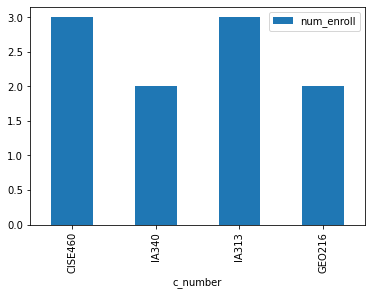

In [64]:
df.plot.bar(x='c_number',y='num_enroll')

In [65]:
q4_sql = """
        select gp13.professor.p_name,
        count(gp13.course.c_name) as num_course
        from gp13.professor
        inner join gp13.course
        on gp13.professor.p_email = gp13.course.p_email
        group by gp13.professor.p_name
        """

In [66]:
df=pandas.read_sql_query(q4_sql,conn)
df[:]

,p_name,num_course
0,Noel Hendrickson,1
1,Timothy Walton,1
2,Xuebin Wei,2
3,new_name,1
4,new_p_lab4_name,1


<AxesSubplot:xlabel='p_name'>

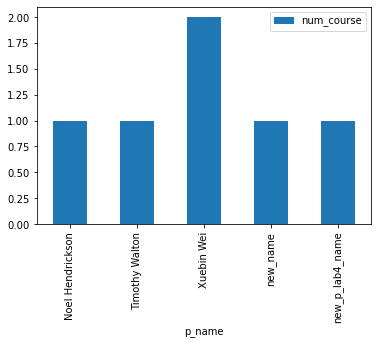

In [67]:
df.plot.bar(x='p_name',y='num_course')

In [68]:
q5_insert_professor_sql = """
            insert into gp13.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp13.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [69]:
cur.execute(q5_insert_professor_sql)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(new_lab4_email) already exists.


In [70]:
# conn.rollback() #if error, rollback

In [71]:
conn.commit() # no error. commit

In [72]:
df=pandas.read_sql_query('select * from gp13.professor',conn)
df[:]

,p_email,p_name,p_office
0,weixx@jmu.edu,Xuebin Wei,ISAT112
1,hendrinx@jmu.edu,Noel Hendrickson,ISAT150
2,waltontr@jmu.edu,Timothy Walton,ISAT326
3,robinja@jmu.edu,John Robinson,ISAT127
4,new_email,new_name,new_office
5,new_lab4_email,new_p_lab4_name,new_lab4_o


In [73]:
q5_insert_course_sql = """
            insert into gp13.course(c_number,c_name,c_room,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp13.course(c_number,c_name,c_room,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [74]:
cur.execute(q5_insert_course_sql)

IntegrityError: duplicate key value violates unique constraint "course_pkey"
DETAIL:  Key (c_number)=(new_lab4_c) already exists.


In [75]:
conn.commit() # no error. commit

In [76]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,GEO216,Earth Observation,EnGeo2014,weixx@jmu.edu
1,IA340,Data Mining,EnGeo2010,weixx@jmu.edu
2,IA313,Counterfactual Reas,EnGeo1204,hendrinx@jmu.edu
3,CISE460,Geospatial Cap,EnGeo2015,waltontr@jmu.edu
4,c_new_n,c_new_name,c_new_r,new_email
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [77]:
q6_update_course_sql ="""
                    update gp13.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','t2@jmu.edu')

In [78]:
cur.execute(q6_update_course_sql)

In [79]:
conn.commit() # no error. commit

In [80]:
df=pandas.read_sql_query('select * from gp13.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,GEO216,Earth Observation,EnGeo2014,weixx@jmu.edu
1,IA340,Data Mining,EnGeo2010,weixx@jmu.edu
2,IA313,Counterfactual Reas,EnGeo1204,hendrinx@jmu.edu
3,CISE460,Geospatial Cap,EnGeo2015,waltontr@jmu.edu
4,c_new_n,c_new_name,c_new_r,new_email
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


In [81]:
q6_delete_professor_sql = """
                            delete from gp13.professor
                            where p_email='{}'
                            """.format('robinja@jmu.edu')

In [82]:
cur.execute(q6_delete_professor_sql)

In [83]:
conn.commit() # no error. commit

In [84]:
df=pandas.read_sql_query('select * from gp13.professor',conn)
df[:]

,p_email,p_name,p_office
0,weixx@jmu.edu,Xuebin Wei,ISAT112
1,hendrinx@jmu.edu,Noel Hendrickson,ISAT150
2,waltontr@jmu.edu,Timothy Walton,ISAT326
3,new_email,new_name,new_office
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [85]:
cur.close()

In [86]:
conn.close()